In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from figure_formatting import figure_formatting as ff
ff.formatting['axes.linewidth'] = 0.5
ff.formatting['lines.linewidth'] = 1.0
ff.set_formatting()

In [2]:
df = pd.read_excel('../Data/Rietveld-S1.xls')

In [3]:
df.columns

Index(['Unnamed: 0', 'Yobs', 'Ycal', 'Ydif', 'Unnamed: 4', 'Bragg peaks',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
df = df.rename(columns={"Unnamed: 0": "2-theta"})

In [5]:
df

,2-theta,Yobs,Ycal,Ydif,Unnamed: 4,Bragg peaks,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,10.04818,754,748.50000,-8523.40039,23.33518,-1627.40002,33.23738,-1627.40002,41.00868,-1627.40002,...,59.38808,-1627.40002,69.77988,-1627.40002,74.70248,-1627.40002,74.70248,-1627.40002,79.51167,-1627.40002
1,10.05618,763,748.50000,-8514.40039,23.33518,-3627.40002,33.23738,-3627.40002,41.00868,-3627.40002,...,59.38808,-3627.40002,69.77988,-3627.40002,74.70248,-3627.40002,74.70248,-3627.40002,79.51167,-3627.40002
2,10.06418,743,748.50000,-8534.40039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.07218,787,748.50000,-8490.40039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.08018,789,748.50000,-8488.40039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,79.96017,263,268.29999,-8534.20020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8740,79.96818,252,267.89999,-8544.80078,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8741,79.97617,274,267.50000,-8522.40039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8742,79.98418,286,267.10001,-8510.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51'}

In [7]:
bragg_entries = np.arange(4, 23, 2)
bragg_2theta_values = [df.iloc[0][i] for i in bragg_entries]

In [8]:
offset = 2000
text_y_pos = []
for b in bragg_2theta_values[:-1]:
    row = np.where(df['2-theta'].values <= b)[0][-1]
    text_y_pos.append(df['Yobs'][row] + offset)

In [9]:
from scipy.signal import find_peaks
peak_indices = find_peaks(df['Ycal'], threshold=0.25)[0]
peaks = df['2-theta'][peak_indices] 
text_y_pos = df['Ycal'][peak_indices] + 2000

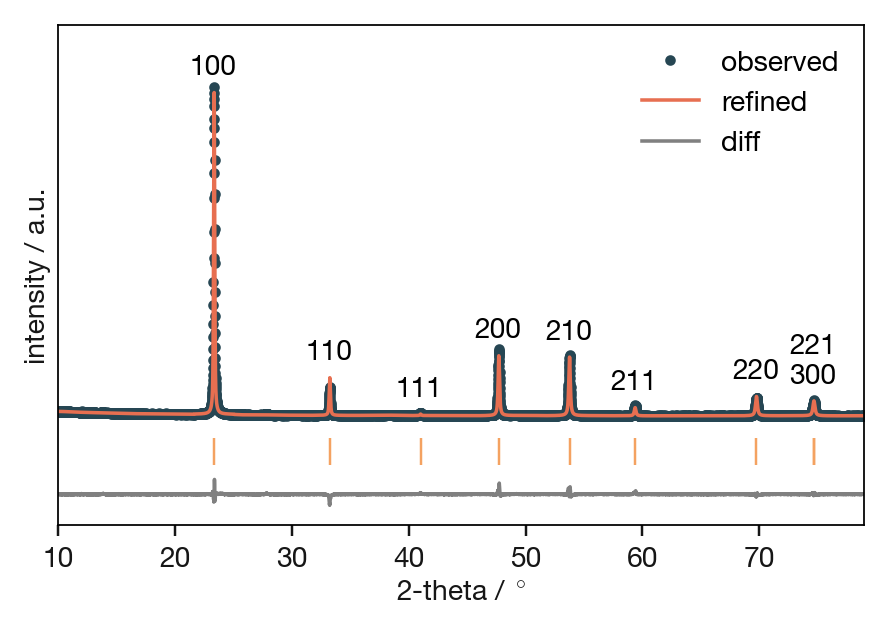

In [10]:
text_labels = ['100', '110', '111', '200', '210', '211', '220', '221\n300']


fig, ax = plt.subplots(figsize=(3.55, 2.55))
# plt.figure(figsize=(3.5,2.5))
plt.plot(df['2-theta'], df['Yobs'], 'o', color=colors['blue'], markersize=2, label='observed')
plt.plot(df['2-theta'], df['Ycal'], '-', color=colors['dark orange'], label='refined')
plt.plot(df['2-theta'], df['Ydif'], '-', color='grey', label='diff')
plt.vlines(bragg_2theta_values, -5200, -2200, color=colors['light orange'], linewidth=0.7)
# plt.vlines(peaks, -2000, 5000)
plt.ylabel('intensity / a.u.')
plt.xlabel('2-theta / $^\circ$')
plt.ylim(-12000, 44000)
plt.yticks([])
plt.legend()
for x, y, s in zip(bragg_2theta_values[:-1], text_y_pos, text_labels):
    plt.text(x-2.1, y, s)
plt.xlim(10, 79)
plt.tight_layout()
plt.savefig('../Figures/TiOF2_Rietveld.pdf')
plt.show()